# 【問題1】断面図の作成

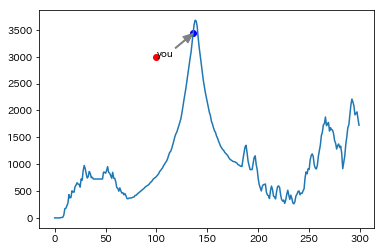

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)
fig = plt.figure()
ax = fig.add_subplot(111)

point = {
        'start': [100, 3000],
        'end': [136, fuji[136,3]]
    }
ax.plot(*point['start'], 'o', color="red")
ax.plot(*point['end'], 'o', color="blue")
ax.annotate('you', xy=point['end'], xytext=point['start'],arrowprops=dict(shrink=0, width=1, headwidth=8,
                                                                        headlength=10, connectionstyle='arc3',
                                                                        facecolor='gray', edgecolor='gray'))
plt.plot(fuji[:,0],fuji[:,3])
plt.show()
print(fuji)

# 【問題2】勾配の計算の関数

In [12]:
#  課題2
gradient = []
for i in range(fuji.shape[0]-1):
    g = fuji[i+1,3]-fuji[i,3]
    gradient.append(g)
gradient



[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.62,
 0.5899999999999999,
 4.989999999999999,
 42.209999999999994,
 117.15,
 6.280000000000001,
 50.370000000000005,
 47.16999999999999,
 158.38,
 -62.01999999999998,
 8.319999999999993,
 123.33999999999997,
 -18.00999999999999,
 -7.569999999999993,
 102.68,
 30.41999999999996,
 44.04000000000008,
 -26.74000000000001,
 -1.580000000000041,
 -54.09000000000003,
 151.4000000000001,
 -22.00999999999999,
 177.52999999999997,
 96.69999999999993,
 -57.00999999999999,
 -102.15999999999997,
 -73.94000000000005,
 27.860000000000014,
 93.13999999999999,
 -37.539999999999964,
 -78.13,
 7.720000000000027,
 -31.610000000000014,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 127.67999999999995,
 -0.8199999999999363,
 -20.360000000000014,
 49.440000000000055,
 74.69999999999993,
 -105.62,
 -17.91999999999996,
 -41.59000000000003,
 -51.039999999999964,
 109.86000000000001,
 -110.53000000000009,
 -1.8199999999999363,
 -64.24000000000001,
 -108.22000000000003,
 -11

# 【問題3】勾配降下法の関数を作成

In [13]:
# 課題3
'''
勾配降下法の関数
Parameters
----------
Input:
    ALPHA:float
    学習率
    int_loc:int
    Xの値である現在の位置

Retun:
    next_loc:int
    次に移動するXの位置

'''
def gradient_descent(init_loc, a):
    next_loc = int(round(init_loc - a * gradient[init_loc]))
    return next_loc

# 【問題4】初期値の変更

In [14]:
ALPHA =0.09
elevation = []#標高を入れるリスト
next_loc =0
X_loc =[]#現在の位置であるXを入れるリスト
X_loc.append(139)
elevation.append(fuji[139,3])#初期値を入れる
next_loc = gradient_descent(139,ALPHA)
elevation.append(fuji[next_loc,3])
X_loc.append(next_loc)
while True:
    next_loc1 = gradient_descent(next_loc,ALPHA)
    X_loc.append(next_loc1)
    elevation.append(fuji[next_loc1,3])
    if abs(next_loc - next_loc1)==0: #次に来るXの位置と現在のXの位置の差が0であれば終了
        break
    next_loc = gradient_descent(next_loc1,ALPHA)
    X_loc.append(next_loc)
    elevation.append(fuji[next_loc,3])

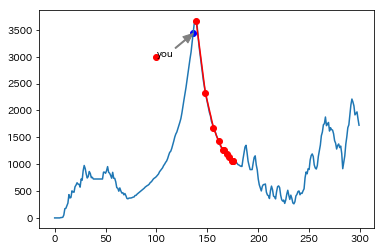

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

point = {
        'start': [100, 3000],
        'end': [136, fuji[136,3]]
    }
ax.plot(*point['start'], 'o', color="red")
ax.plot(*point['end'], 'o', color="blue")
ax.annotate('you', xy=point['end'], xytext=point['start'],arrowprops=dict(shrink=0, width=1, headwidth=8,
                                                                        headlength=10, connectionstyle='arc3',
                                                                        facecolor='gray', edgecolor='gray'))
plt.plot(fuji[:,0],fuji[:,3])
plt.plot(X_loc,elevation,marker="o",color="red")
plt.show()